In [1]:
import diplib as dip
import numpy as np
import os

# --- Configuration (adjust these paths) ---
input_dir  = r"2025Assignment06Images"
output_dir = r"output"
os.makedirs(output_dir, exist_ok=True)

DIPlib -- a quantitative image analysis library
Version 3.5.2 (Dec 27 2024)
For more information see https://diplib.org


# Part 1

Image sizes: [160, 140]
Number of images (slices): 16
Slice 0:


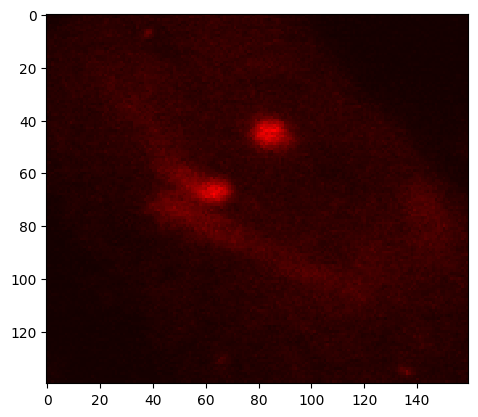

Slice 1:


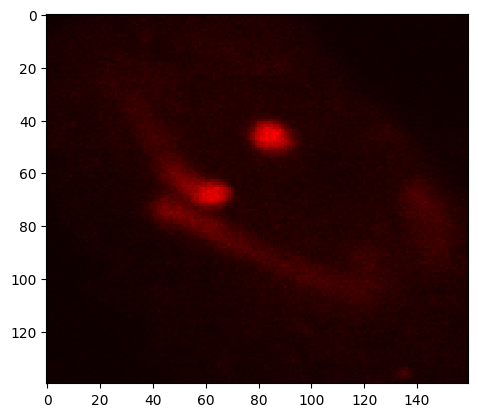

Slice 2:


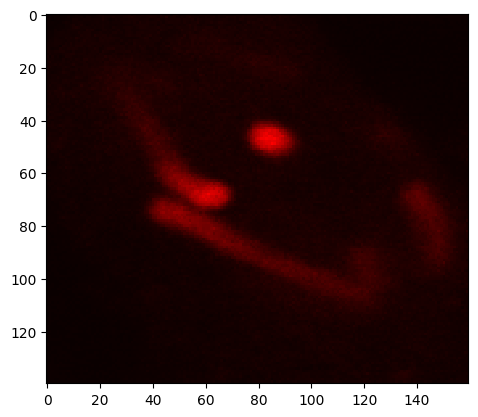

Slice 3:


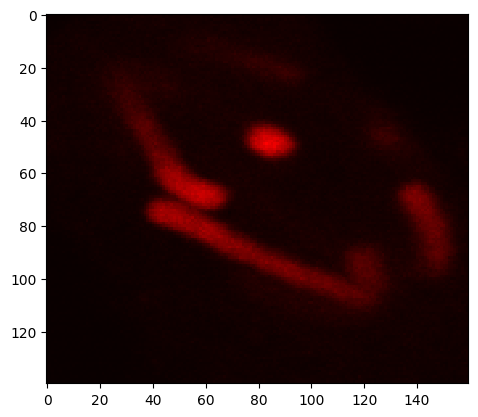

Slice 4:


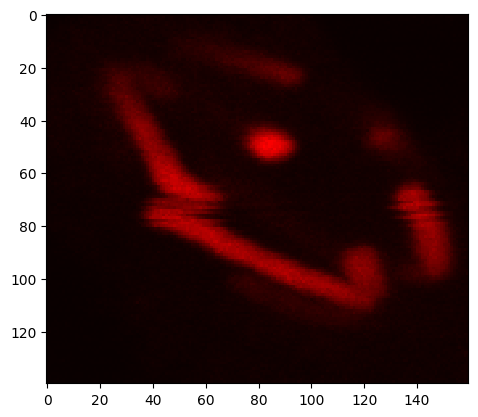

Slice 5:


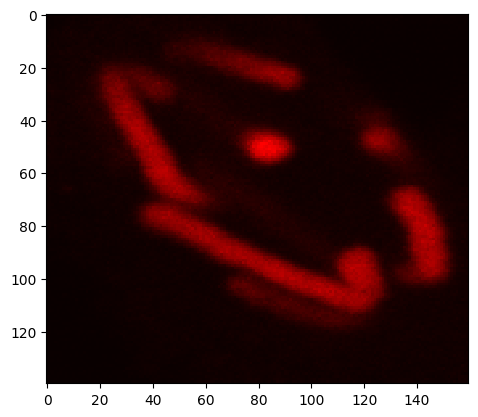

Slice 6:


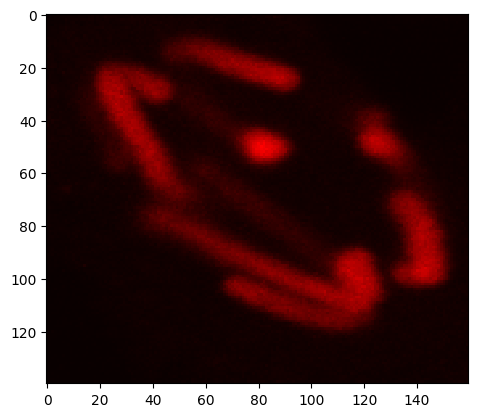

Slice 7:


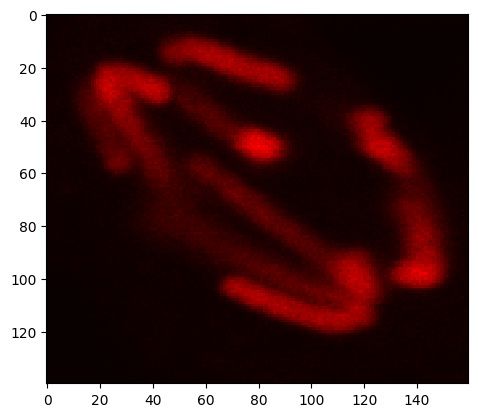

Slice 8:


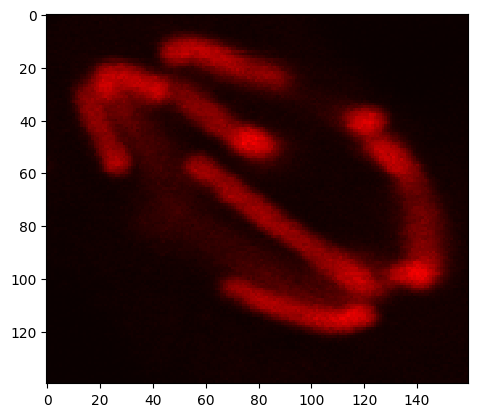

Slice 9:


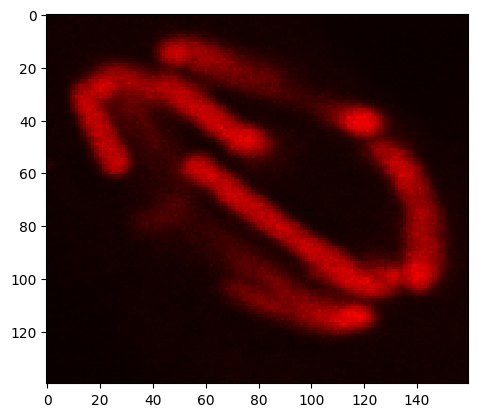

Slice 10:


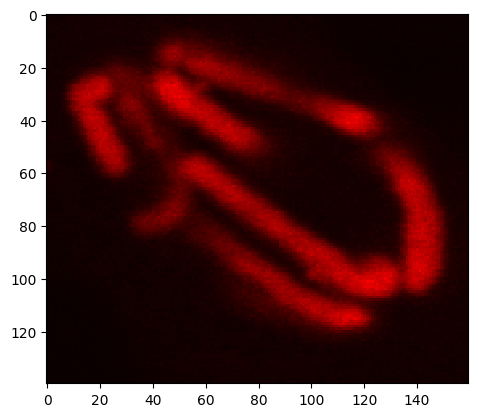

Slice 11:


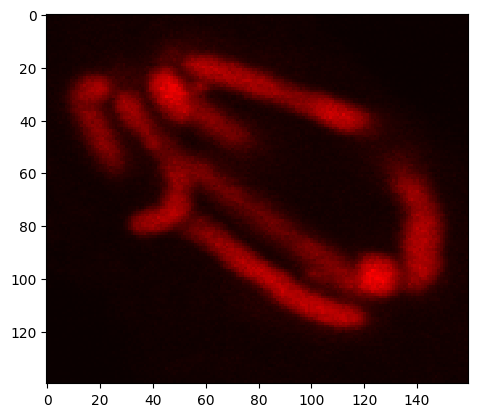

Slice 12:


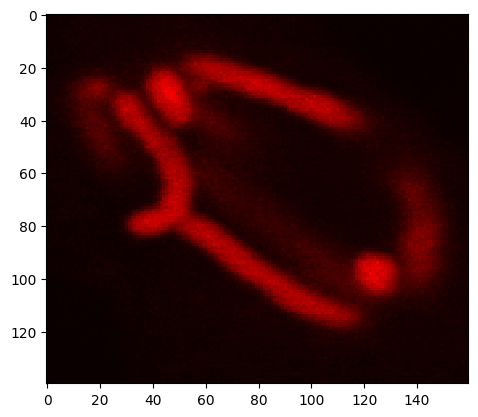

Slice 13:


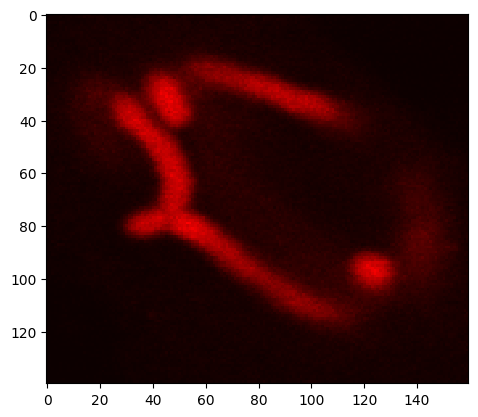

Slice 14:


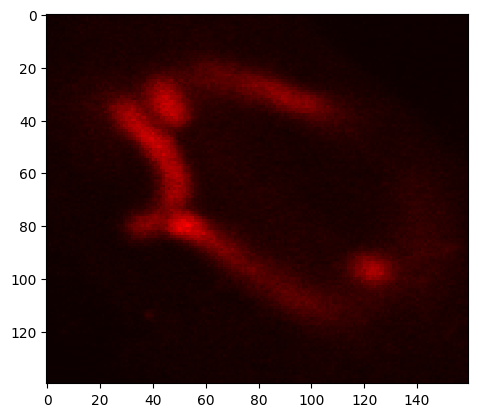

Slice 15:


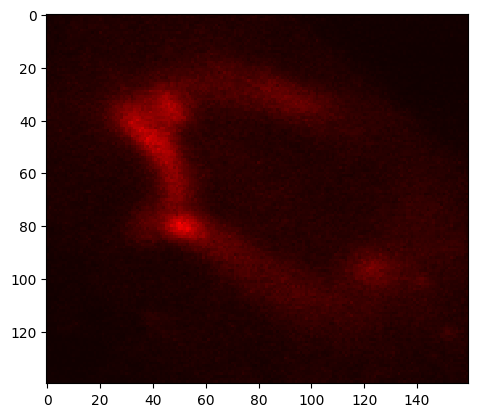

In [2]:
# 1.1
info = dip.ImageReadTIFFInfo(os.path.join(input_dir,"CHROMO3D.tif"))
print(f"Image sizes: {info['sizes']}")
print(f"Number of images (slices): {info['numberOfImages']}")
# Aspect ratio is 40:35:4

# 1.2
for i in range(info['numberOfImages']):
    print(f"Slice {i}:")
    img = dip.ImageReadTIFF(os.path.join(input_dir,"CHROMO3D.tif"), imageNumbers=i)
    dip.Show(img)
    dip.ImageWritePNG(img, os.path.join(output_dir, f'slice{i}.png'))



# Part 2

Best threshold value: 67.5


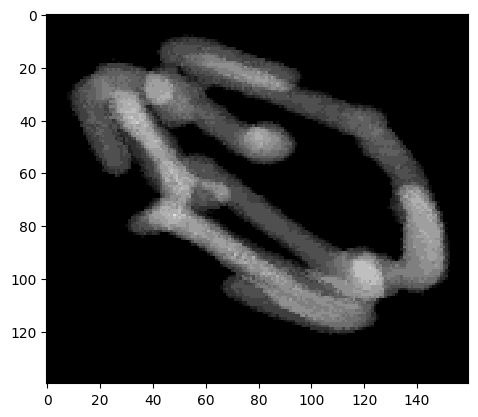

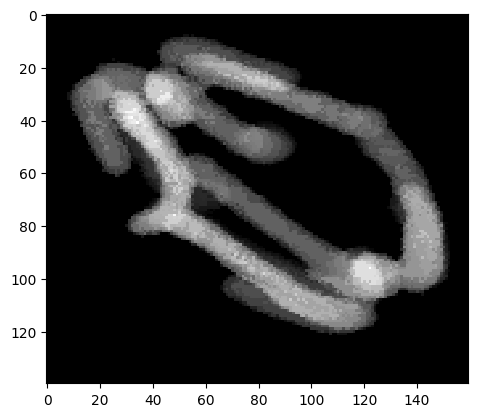

In [56]:
# 2.1

img = dip.ImageReadTIFF(os.path.join(input_dir,"CHROMO3D.tif"), imageNumbers=slice(0,-1), useColorMap='ignore')

out = dip.Image()
value = dip.OtsuThreshold(img, out=out)

print(f"Best threshold value: {value}")
dip.Show(out)
dip.ImageWriteTIFF(out, os.path.join(output_dir, "binary.tif"))

# 2.2

out_np = np.array(out)
result_np = np.zeros(shape=out_np.shape, dtype=np.uint8)

depth = out_np.shape[0]

for z in range(depth):
    slice_bin = out_np[z]
    mask = slice_bin != 0
    intensity = round(((z + 1) / depth) * 255)
    result_np[z][mask] = intensity

result = dip.Image(result_np)
dip.Show(result)
dip.ImageWriteTIFF(result, os.path.join(output_dir, "depth_cue.tif"))